# AR MODELS

In [1]:
from ipynb.fs.full.functions import *
# import ipynb.fs.full.my_functions

### Reading the csv file

In [2]:
df.head()

,Datetime,Count
0,2012-08-25,3.166667
1,2012-08-26,3.666667
2,2012-08-27,2.583333
3,2012-08-28,2.416667
4,2012-08-29,2.500000


In [3]:
describe(df)

,count,mean,std,min,25%,50%,75%,max
Count,494.0,60.804656,57.468859,2.416667,15.520833,37.083333,95.0625,257.75


In [4]:
resumetable(df)

Dataset Shape: (494, 2)


,Name,dtypes,Missing,Missing(% of Total values),Uniques,First Value,Second Value
0,Datetime,datetime64[ns],0,0.0,494,2012-08-25 00:00:00,2012-08-26 00:00:00
1,Count,float64,0,0.0,415,3.166667,3.666667


### Splitting the data into train and test

In [5]:
test.head()

,Datetime,Count
444,2013-11-12,135.916667
445,2013-11-13,178.083333
446,2013-11-14,165.916667
447,2013-11-15,120.833333
448,2013-11-16,80.333333


In [6]:
y_hat.head()

,Datetime,Count
444,2013-11-12,135.916667
445,2013-11-13,178.083333
446,2013-11-14,165.916667
447,2013-11-15,120.833333
448,2013-11-16,80.333333


# Autoregressive Models

By plotting ACF and PACF, we can find a suitable model with help of this table given below :-

| Model | ACF Pattern | PACF Pattern |
| --- | --- | --- |
| AR(p) | Exponential decay or damped sine wave pattern or both | Significant spike through first lag |
| MA(q) | Significant spike through first lag | Exponential decay |
| ARMA(1,1) | Exponential decay from lag 1 | Exponential decay from lag 1 |
| ARMA(p,q) | Exponential decay | Exponential decay |

### 1) AR()

In [7]:
def AR(lags, method = "AR"):
    global y_hat
    model = AutoReg(train[time_dependent_variable], lags=lags)
    fit1 = model.fit()
    
    y_hat[method] = fit1.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
    rmse = sqrt(mean_squared_error(test[time_dependent_variable], y_hat[method]))
    print('RMSE = '+str(rmse))
    
AR(lags= 28)

RMSE = 30.95429224296152


In [8]:
def evaluate_models(p_values=range(30)):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        try:
            rmse = AR(p)
            if rmse < best_score:
                best_score, best_cfg = rmse, p
            print('AR%s RMSE=%.3f' % (p,rmse))
        except:
            continue
    print('Best AR%s RMSE=%.3f' % (best_cfg, best_score))
    
evaluate_models(p_values=range(30))

RMSE = 110.26167600347945
RMSE = 96.01127677565098
RMSE = 97.59813586387553
RMSE = 83.47706248931061
RMSE = 77.50361255899846
RMSE = 61.929723386845914
RMSE = 40.09051187634783
RMSE = 34.02351793877164
RMSE = 33.94358886068561
RMSE = 33.81071939565093
RMSE = 36.39006370024153
RMSE = 34.17517468310582
RMSE = 34.217079375778916
RMSE = 31.948818070273948
RMSE = 30.226091252770193
RMSE = 30.296375244509594
RMSE = 29.680632984027156
RMSE = 29.618787599172524
RMSE = 29.67801089810546
RMSE = 30.034622535062315
RMSE = 29.728131384824206
RMSE = 29.263034747243687
RMSE = 29.054796124289403
RMSE = 29.03157189646809
RMSE = 29.22634577500091
RMSE = 29.033924309797076
RMSE = 29.507836537371045
RMSE = 29.499430863819395
RMSE = 30.95429224296152
RMSE = 30.467200212364386
Best ARNone RMSE=inf


In [9]:
y_hat.head()

,Datetime,Count,AR
444,2013-11-12,135.916667,191.982715
445,2013-11-13,178.083333,171.809835
446,2013-11-14,165.916667,181.780863
447,2013-11-15,120.833333,148.364661
448,2013-11-16,80.333333,102.617067


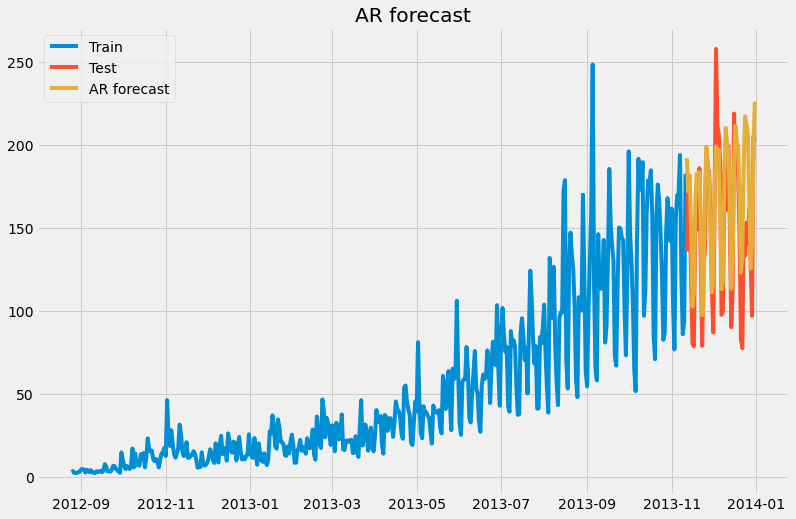

Evaluation metric results:-
MSE is : 928.2502887802964
MAE is : 23.64501988810756
RMSE is : 30.467200212364386
MAPE is : 18.302085753636305
R2 is : 0.509037931335476



In [10]:
plot_with_metric(method= 'AR' )

# MA

# ARMA

In [11]:
def ARMA(AR,MA, method = "ARMA"):
    global y_hat
    model = ARMA(train[time_dependent_variable], order=(AR,MA))
    fit1 = model.fit(disp=False)
    
    y_hat[method] = fit1.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
    
    
ARMA(AR= 1,MA = 1, method = "ARMA")

TypeError: ARMA() got an unexpected keyword argument 'order'

m refers to the number of periods in each season.

• 7 → Daily

• 12 → Monthly

• 52 → Weekly

• 4 → Quarterly

• 1 → Annual (non-seasonal)

In [13]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(p_values=range(4), d_values=range(2), q_values=range(4), P_values=range(4), D_values=range(2), Q_values=range(4)):
    best_score, best_cfg = float("inf"), None
#for m in [1, 4,7,12,52]:
    for p in p_values:
        for d in d_values:
            for q in q_values:
                    for P in P_values:
                        for D in D_values:
                            for Q in Q_values:
                                order = (p,d,q,P,D,Q)
                                try:
                                    rmse = ARIMA_forecasting(*order)
                                    if rmse < best_score:
                                        best_score, best_cfg = rmse, order
                                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                                except:
                                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
    
evaluate_models()

Best ARIMANone RMSE=inf


In [ ]:
import pmdarima as pmd

def arimamodel():
    autoarima_model = pmd.auto_arima(train[time_dependent_variable], 
                              start_p=1, 
                              start_q=1,
                               max_p=7, max_q=7, seasonal=False,
                               d=None, trace=True,error_action='ignore',
                              suppress_warnings=True,stepwise=True)
    return autoarima_model


• Pmdarima (for py + arima) is a statistical library designed to fill the void in Python’s time-series analysis capabilities, which is the equivalent of R’s auto.arima

In [ ]:
plot_with_metric(method=  "Auto_ARIMA")

Seasonal ARIMA using Pmdarima Library

In [ ]:
def sarimamodel():
    auto_sarima_model = pmd.auto_arima(train[time_dependent_variable], 
                                   start_p=1, start_q=1,
                                    max_p=7, max_q=7, seasonal=True, start_P=1,
                                    start_Q=1, max_P=7, max_D=7, max_Q=7, m=m,
                                    d=None, D=None, trace=True, error_action='ignore', 
                                    suppress_warnings=True,
                                    stepwise=True)

    return auto_sarima_model

In [ ]:
# for m in [1, 4,7,12,52]:
#     print("="*100)
#     print(f' Fitting SARIMA for Seasonal value m = {str(m)}')
#     auto_arima(method = "Auto_SARIMA", model = sarimamodel())


In [ ]:
m = 7
auto_arima(method = "Auto_SARIMA", model = sarimamodel())

In [ ]:
plot_with_metric(method=  "Auto_SARIMA")